In [1]:
import dask
import os
import numpy as np
import letkf_forecasting.letkf_forecasting as lf
import letkf_forecasting.tmh_plot as tmh_plot
import letkf_forecasting.analyse_results as ar
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import importlib

In [2]:
import datetime

In [3]:
from letkf_forecasting import letkf_io, analyse_results, letkf_forecasting, tmh_plot

In [4]:
%matplotlib inline

In [29]:
# runs = ['persistence', 'opt_flow', 'wrf_no_div', 'owp_opt']#, 'radiosonde', 'wrf_mean']
runs = ['owp_opt', 'persistence', 'opt_flow', 'wrf_no_div']
# runs = ['persistence', 'opt_flow', 'wrf_no_div', 'owp_opt', 'wrf_mean']
base_folder = '/a2/uaren/travis/'
year = 2014
month_day = [[4, 9],  [4, 15], [4, 18],
             [5, 6],  [5, 9],  [5, 29],
             [6, 11], [6, 12],
             [4, 2],  [4, 5],  [4, 19],
             [5, 7],  [5, 8],  [5, 19],
             [6, 3],  [6, 10], [6, 14],
             [6, 15],
             [4, 10], [4, 11], [4, 12],
             [4, 20], [4, 21], [4, 22],
             [4, 25], [4, 26], [5, 5],
             [5, 20], [5, 21], [5, 22],
             [5, 23], [5, 24], [5, 25],
             [5, 30], [6, 16], [6, 17],
             [6, 18], [6, 19], [6, 22]]
bad_dates = []
persistence = pd.DataFrame(columns=[15, 30, 45, 60])
opt_flow = persistence.copy()
wrf_no_div = persistence.copy()
owp_opt = persistence.copy()

# wrf_mean = persistence.copy()

persistence_full = persistence.copy()
opt_flow_full = persistence.copy()
wrf_no_div_full = persistence.copy()
owp_opt_full = persistence.copy()

# wrf_mean_full = persistence.copy()
for this_month_day in month_day:
    month = this_month_day[0]
    day = this_month_day[1]
    try:
        returned = analyse_results.find_error_stats(
            year, month, day, runs, base_folder)
        for this_stat in returned:
            name = this_stat['name']
            this_date = this_stat['rmse'].index[0].date()
            command = (name + '.loc[this_date] = '
                + 'np.sqrt((this_stat[\'rmse\']**2).mean())')
#             print(command)
            exec(command)
            command = (name + '_full = pd.concat(['
                 + name +'_full, this_stat[\'rmse\'][[15, 30, 45, 60]]])')
#             print(command)
            exec(command)
    except:
        bad_dates.append(this_month_day)

/a2/uaren/travis/results/2014/04/09/owp_opt_000
/a2/uaren/travis/results/2014/04/09/persistence_000
/a2/uaren/travis/results/2014/04/09/opt_flow_001
/a2/uaren/travis/results/2014/04/09/wrf_no_div_001
/a2/uaren/travis/results/2014/04/15/owp_opt_000
/a2/uaren/travis/results/2014/04/15/persistence_000
/a2/uaren/travis/results/2014/04/15/opt_flow_000
/a2/uaren/travis/results/2014/04/15/wrf_no_div_000
/a2/uaren/travis/results/2014/04/18/owp_opt_000
/a2/uaren/travis/results/2014/04/18/persistence_000
/a2/uaren/travis/results/2014/04/18/opt_flow_001
/a2/uaren/travis/results/2014/04/18/wrf_no_div_000
/a2/uaren/travis/results/2014/05/06/owp_opt_000
/a2/uaren/travis/results/2014/05/06/persistence_000
/a2/uaren/travis/results/2014/05/06/opt_flow_001
/a2/uaren/travis/results/2014/05/06/wrf_no_div_000
/a2/uaren/travis/results/2014/05/09/owp_opt_000
/a2/uaren/travis/results/2014/05/09/persistence_000
/a2/uaren/travis/results/2014/05/09/opt_flow_001
/a2/uaren/travis/results/2014/05/09/wrf_no_div_000


In [30]:
persistence = persistence.sort_index()
opt_flow = opt_flow.sort_index()
wrf_no_div = wrf_no_div.sort_index()
owp_opt = owp_opt.sort_index()

# wrf_mean = wrf_mean.sort_index()

In [31]:
figsize = plt.figaspect(0.3)
xticks = [str(index.month) + '/' + str(index.day)
          for index in persistence.index]
xarange = np.arange(len(xticks))
width = 0.28

In [32]:
%matplotlib notebook

In [33]:
# for hor in [15, 30, 45, 60]:
#     of_skill = 1 - opt_flow[hor]/persistence[hor]
#     wrf_skill = 1 - wrf_no_div[hor]/persistence[hor]
#     owp_skill = 1 - owp_opt[hor]/persistence[hor]
    

    
#     plt.figure(figsize=figsize)
#     plt.bar(xarange,
#             of_skill, width, color='k')
#     plt.bar(xarange + width,
#                 wrf_skill, width)
#     plt.bar(xarange + 2*width,
#                 owp_skill, width)
#     plt.xticks(xarange + width, xticks , rotation=90)
#     plt.title(f'RMSE skill score; Horizon: {hor}')
#     plt.legend(['Opt. Flow',
#                 'WRF',
#                 'Assim'])
#     plt.xlabel('Date')
#     plt.ylabel('RMSE skill score')
    
#     plt.ylim([0, None])
#     plt.tight_layout()

<IPython.core.display.Javascript object>


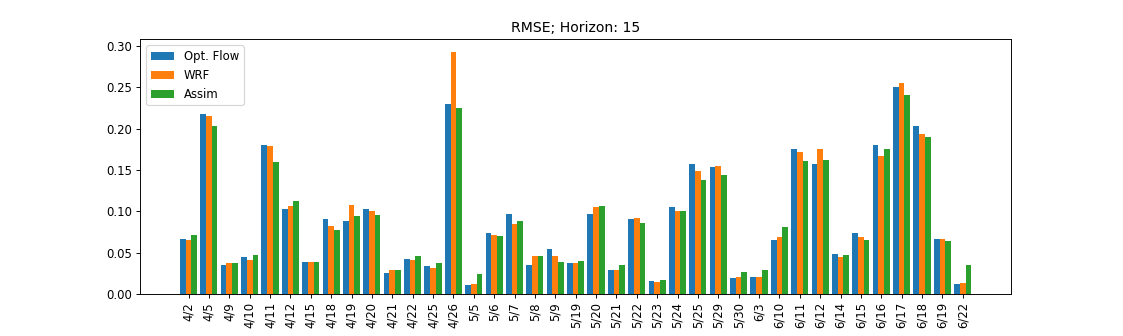

<IPython.core.display.Javascript object>


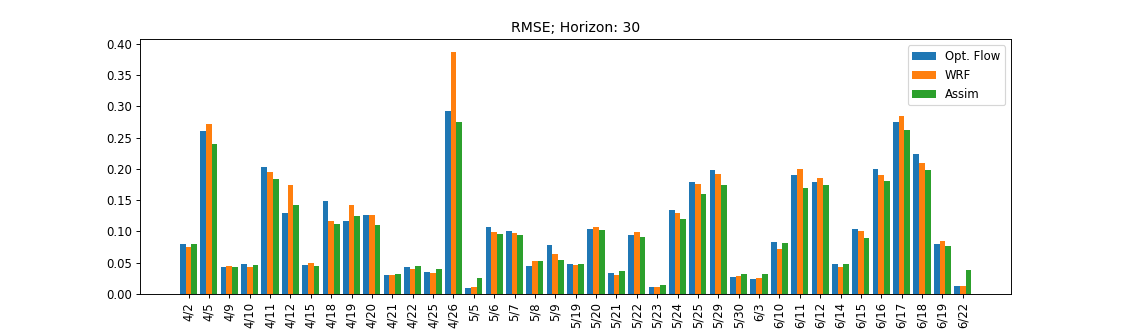

<IPython.core.display.Javascript object>


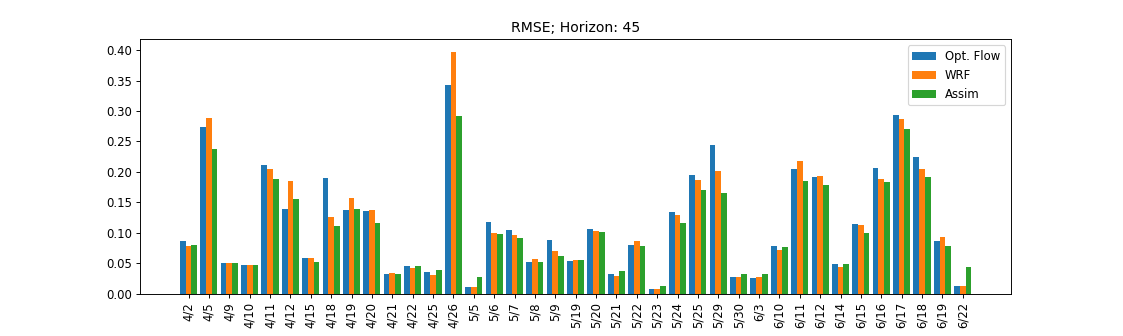

<IPython.core.display.Javascript object>


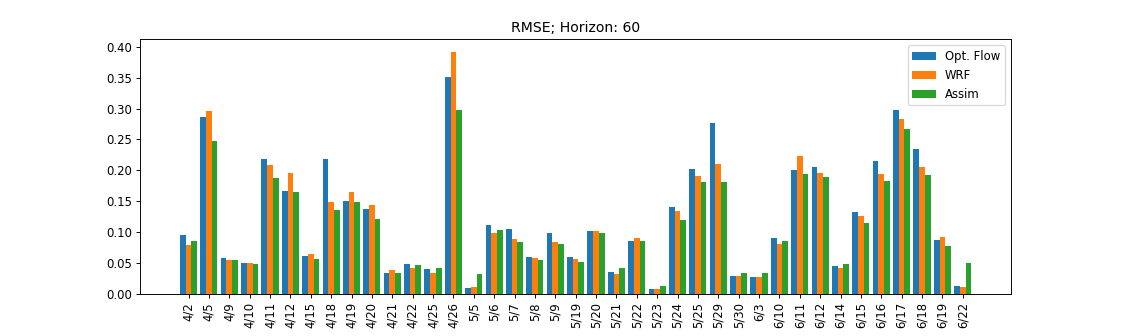

In [34]:
for hor in [15, 30, 45, 60]:
    plt.figure(figsize=figsize)
    plt.bar(xarange,
            opt_flow[hor], width)
    plt.bar(xarange + width,
            wrf_no_div[hor], width)
    plt.bar(xarange + 2*width,
            owp_opt[hor], width)
    plt.xticks(xarange + width, xticks , rotation=90)
    plt.title(f'RMSE; Horizon: {hor}')
    plt.legend(['Opt. Flow',
                'WRF',
                'Assim'])

In [35]:
persistence.loc['All Dates'] = np.sqrt((persistence_full**2).mean(axis=0))
opt_flow.loc['All Dates'] = np.sqrt((opt_flow_full**2).mean(axis=0))
wrf_no_div.loc['All Dates'] = np.sqrt((wrf_no_div_full**2).mean(axis=0))
owp_opt.loc['All Dates'] = np.sqrt((owp_opt_full**2).mean(axis=0))

# wrf_mean.loc['All_Dates'] = np.sqrt((wrf_mean_full**2).mean(axis=0))

In [51]:
peices = [owp_opt, persistence, opt_flow, wrf_no_div]
combined = pd.concat(peices, axis=1,
                    keys=['BACON', 'Persis.', 'Opt. Flow', 'WRF'],
                    names=['Method', 'Horizon'])
combined = combined.swaplevel(axis=1).sort_index(axis=1,
                                                 level='Horizon')

# peices = [persistence, opt_flow, wrf_no_div, owp_opt]
# combined = pd.concat(peices, axis=1,
#                     keys=['Persis.', 'Opt. Flow', 'WRF', 'BACON'],
#                     names=['Method', 'Horizon'])
# combined = combined.swaplevel(axis=1).sort_index(axis=1,
#                                                  level='Horizon')

In [52]:
# Landscape Table

In [53]:
def is_empty(str):
    return str != ''

In [54]:
def format_table(text, header_num=5, footer_num=2):
    text = text.split(' ')
    text = list(filter(is_empty, text))
    text = ' '.join(text)
    split_text = text.split('\n')
    hor_num = len(split_text[2].split('&')) - 1
    run_num = int((len(split_text[3].split('&')) - 1) / hor_num)
    
    header1 = split_text[header_num - 3].split(' ')
    for count in range(hor_num - 1):
        index = (count + 1) * 2 + 1 + count
        header1.insert(index, '&')
    header1 = ' '.join(header1)
    split_text[header_num - 3] = header1
    
    header2 = split_text[header_num - 2].split('&')
    for count in range(hor_num - 1):
        index = (count + 1) * run_num + 1 + count
        header2.insert(index, ' ')
    header2 = '&'.join(header2)
    split_text[header_num - 2] = header2
    
    header3 = ''
    buff = 1
    for count in range(hor_num):
        start = count * (run_num + 1) + 2
        end = start + run_num - 1
        header3 += f'\cmidrule(lr){{{start}-{end}}} '
    split_text[header_num - 1] = header3
    
    for line_num, line in enumerate(split_text[header_num:-footer_num - 1]):
        split_line = line.split(' ')
#         split_line = line.split(' ')[2::2]
        split_line[0] = split_line[0][5:].replace('-', '/')
        for hor_count in range(hor_num):
            num_slice = slice(
                (hor_count*run_num)*2 + 2, ((hor_count + 1)*run_num)*2 + 2, 2)
            numbers = np.array(
                split_line[num_slice],
                dtype='float')
            argmins = np.where(numbers == numbers.min())[0]
            numbers = list(numbers.astype('str'))
            for argmin in argmins:
                numbers[argmin] = '\\textbf{' + numbers[argmin] + '}'
            split_line[num_slice] = numbers
        for count in range(hor_num - 1):
            split_line.insert(((count + 1)*run_num)*2 + 2 + count, '&')
        split_line
        split_text[header_num + line_num] = ' '.join(split_line)
    return '\n'.join(split_text)

In [55]:
this_combined = combined.iloc[:20]
hor_num = this_combined.columns.levels[0].size
c_num = combined.columns.size + hor_num - 1
column_format = 'l' + 'c' * c_num
text = this_combined.round(decimals=3).to_latex(
    column_format=column_format,
    multicolumn_format='c')

In [56]:
# print(text, '\n \n')
text2 = format_table(text)
print(text2)

\begin{tabular}{lccccccccccccccccccc}
\toprule
Horizon & \multicolumn{4}{c}{15} & & \multicolumn{4}{c}{30} & & \multicolumn{4}{c}{45} & & \multicolumn{4}{c}{60} \\
Method & BACON & Persis. & Opt. Flow & WRF & & BACON & Persis. & Opt. Flow & WRF & & BACON & Persis. & Opt. Flow & WRF & & BACON & Persis. & Opt. Flow & WRF \\
\cmidrule(lr){2-5} \cmidrule(lr){7-10} \cmidrule(lr){12-15} \cmidrule(lr){17-20} 
04/02 & 0.072 & \textbf{0.065} & 0.066 & \textbf{0.065} & & 0.081 & 0.078 & 0.079 & \textbf{0.076} & & 0.08 & 0.08 & 0.086 & \textbf{0.078} & & 0.085 & 0.085 & 0.095 & \textbf{0.08} \\
04/05 & \textbf{0.203} & 0.239 & 0.217 & 0.215 & & \textbf{0.24} & 0.258 & 0.261 & 0.272 & & \textbf{0.238} & 0.261 & 0.274 & 0.288 & & \textbf{0.247} & 0.273 & 0.287 & 0.296 \\
04/09 & 0.037 & 0.066 & \textbf{0.034} & 0.038 & & 0.043 & 0.075 & \textbf{0.042} & 0.045 & & \textbf{0.05} & 0.076 & 0.051 & 0.051 & & \textbf{0.054} & 0.072 & 0.059 & 0.055 \\
04/10 & 0.047 & 0.045 & 0.044 & \textbf{0.041} & & 0.

In [57]:
# protrait table

In [58]:
def is_empty(str):
    return str != ''

In [59]:
def format_table(text, header_num=5, footer_num=2):
    text = text.split(' ')
    text = list(filter(is_empty, text))
    text = ' '.join(text)
    split_text = text.split('\n')
    hor_num = len(split_text[2].split('&')) - 1
    run_num = int((len(split_text[3].split('&')) - 1) / hor_num)
    
    header1 = split_text[header_num - 3].split(' ')
    for count in range(hor_num - 1):
        index = (count + 1) * 2 + 1 + count
        header1.insert(index, '&')
    header1 = ' '.join(header1)
    split_text[header_num - 3] = header1
    
    header2 = split_text[header_num - 2].split('&')
    for count in range(hor_num - 1):
        index = (count + 1) * run_num + 1 + count
        header2.insert(index, ' ')
    header2 = '&'.join(header2)
    split_text[header_num - 2] = header2
    
    header3 = ''
    buff = 1
    for count in range(hor_num):
        start = count * (run_num + 1) + 2
        end = start + run_num - 1
        header3 += f'\cmidrule(lr){{{start}-{end}}} '
    split_text[header_num - 1] = header3
    
    for line_num, line in enumerate(split_text[header_num:-footer_num - 1]):
        split_line = line.split(' ')
        split_line[0] = split_line[0][5:].replace('-', '/')
        for hor_count in range(hor_num):
            num_slice = slice(
                (hor_count*run_num)*2 + 2, ((hor_count + 1)*run_num)*2 + 2, 2)
            numbers = np.array(
                split_line[num_slice],
                dtype='float')
            argmins = np.where(numbers == numbers.min())[0]
            numbers = list(numbers.astype('str'))
            for argmin in argmins:
                numbers[argmin] = '\\textbf{' + numbers[argmin] + '}'
            split_line[num_slice] = numbers
        for count in range(hor_num - 1):
            split_line.insert(((count + 1)*run_num)*2 + 2 + count, '&')
        split_line
        split_text[header_num + line_num] = ' '.join(split_line)
    footer1 = split_text[-footer_num - 1].split(' ')
    for hor_count in range(hor_num):
        num_slice = slice(
            (hor_count*run_num)*2 + 3, ((hor_count + 1)*run_num)*2 + 3, 2)
        numbers = np.array(
            footer1[num_slice],
            dtype='float')
        argmins = np.where(numbers == numbers.min())[0]
        numbers = list(numbers.astype('str'))
        for argmin in argmins:
            numbers[argmin] = '\\textbf{' + numbers[argmin] + '}'
        footer1[num_slice] = numbers
    for count in range(hor_num - 1):
        footer1.insert(((count + 1)*run_num)*2 + 3 + count, '&')
    split_text[-footer_num - 1] = ' '.join(footer1)
    split_text.insert(-footer_num -1, header3)
    return '\n'.join(split_text)

In [60]:
combined[[15, 30]]

Horizon           15                                      30            \
Method         BACON   Persis. Opt. Flow       WRF     BACON   Persis.   
2014-04-02  0.071813  0.065036  0.066110  0.064849  0.080543  0.077579   
2014-04-05  0.202972  0.238562  0.217230  0.215488  0.240286  0.258377   
2014-04-09  0.036916  0.066406  0.034440  0.037981  0.043381  0.074600   
2014-04-10  0.046702  0.045090  0.044186  0.040658  0.045477  0.050782   
2014-04-11  0.159808  0.176573  0.180414  0.179324  0.183740  0.208618   
2014-04-12  0.112184  0.090760  0.102848  0.106433  0.142866  0.109812   
2014-04-15  0.039024  0.068700  0.038072  0.038111  0.044536  0.071061   
2014-04-18  0.077649  0.096123  0.091176  0.081756  0.111258  0.126829   
2014-04-19  0.094374  0.101713  0.088437  0.107489  0.124693  0.133094   
2014-04-20  0.095739  0.104062  0.103272  0.100630  0.110867  0.121707   
2014-04-21  0.028925  0.023294  0.025488  0.029486  0.031528  0.026374   
2014-04-22  0.045556  0.043901  0.042505  0.040419  0.044969  0.048949   
2014-04-25  0.037941  0.038486  0.034065  0.031483  0.040272  0.042168   
2014-04-26  0.225033  0.240102  0.230160  0.293279  0.274393  0.320873   
2014-05-05  0.023511  0.018382  0.010541  0.012490  0.025603  0.016078   
2014-05-06  0.070041  0.102345  0.073282  0.071454  0.095168  0.141421   
2014-05-07  0.087704  0.099787  0.096368  0.084209  0.094704  0.114177   
2014-05-08  0.045640  0.059519  0.034425  0.045305  0.052281  0.064647   
2014-05-09  0.038965  0.078454  0.054151  0.045334  0.054893  0.085507   
2014-05-19  0.039493  0.057233  0.037584  0.037294  0.048143  0.061787   
2014-05-20  0.106588  0.095269  0.096339  0.104939  0.102872  0.103642   
2014-05-21  0.034676  0.030026  0.029316  0.028444  0.035914  0.034689   
2014-05-22  0.085800  0.091193  0.090276  0.091636  0.091126  0.099468   
2014-05-23  0.016804  0.015288  0.015631  0.014886  0.013959  0.016054   
2014-05-24  0.099823  0.111010  0.105489  0.100487  0.119452  0.131279   
2014-05-25  0.137638  0.173511  0.157657  0.148933  0.159432  0.194594   
2014-05-29  0.143403  0.170066  0.154113  0.155041  0.174248  0.218365   
2014-05-30  0.026307  0.018302  0.019188  0.020032  0.031134  0.024798   
2014-06-03  0.028504  0.032778  0.020999  0.020997  0.031592  0.031905   
2014-06-10  0.080754  0.076718  0.065524  0.069252  0.081473  0.091950   
2014-06-11  0.160907  0.170964  0.175358  0.171258  0.168917  0.200395   
2014-06-12  0.162441  0.175959  0.156876  0.174885  0.174960  0.202284   
2014-06-14  0.047106  0.050057  0.048122  0.044410  0.047247  0.049769   
2014-06-15  0.064917  0.156663  0.074146  0.068468  0.088810  0.184715   
2014-06-16  0.175214  0.183737  0.180291  0.167361  0.181276  0.195621   
2014-06-17  0.240968  0.252138  0.249945  0.255276  0.262718  0.277691   
2014-06-18  0.190031  0.219484  0.203299  0.192939  0.198528  0.224213   
2014-06-19  0.064400  0.069038  0.066691  0.066523  0.076824  0.077626   
2014-06-22  0.035470  0.011883  0.011816  0.012864  0.038568  0.012813   
All Dates   0.108399  0.121831  0.112790  0.115960  0.123390  0.141211   

Horizon                         
Method     Opt. Flow       WRF  
2014-04-02  0.079484  0.075772  
2014-04-05  0.261308  0.272355  
2014-04-09  0.042305  0.044994  
2014-04-10  0.047015  0.043575  
2014-04-11  0.202285  0.195415  
2014-04-12  0.130166  0.173680  
2014-04-15  0.046154  0.049880  
2014-04-18  0.147948  0.117026  
2014-04-19  0.116761  0.142618  
2014-04-20  0.125984  0.125582  
2014-04-21  0.030342  0.030445  
2014-04-22  0.043234  0.039979  
2014-04-25  0.035235  0.033649  
2014-04-26  0.291920  0.387613  
2014-05-05  0.010191  0.011556  
2014-05-06  0.106529  0.099781  
2014-05-07  0.100043  0.097803  
2014-05-08  0.044381  0.052719  
2014-05-09  0.078733  0.063406  
2014-05-19  0.047223  0.046731  
2014-05-20  0.103834  0.107087  
2014-05-21  0.033867  0.030446  
2014-05-22  0.094212  0.099063  
2014-05-23  0.011560  0.011625  
2014-05-24  0.133825  0.129599  


In [61]:
save_directory = "/home2/travis/python_code/letkf_forecasting/tables/"

In [62]:
this_combined = combined[[15, 30]]
hor_num = this_combined.columns.levels[0].size
c_num = combined.columns.size + hor_num - 1
column_format = 'l' + 'c' * c_num
text = this_combined.round(decimals=3).to_latex(
#     column_format='l|ccc|ccc|ccc|ccc',
    column_format=column_format,
    multicolumn_format='c')

In [63]:
# print(text, '\n \n')
text2 = format_table(text, footer_num=3)
print(text2)
this_file = os.path.join(save_directory, 'all_days_1.tex')
with open(this_file, 'w') as file:
    file.write(text2)

\begin{tabular}{lccccccccccccccccccc}
\toprule
Horizon & \multicolumn{4}{c}{15} & & \multicolumn{4}{c}{30} \\
Method & BACON & Persis. & Opt. Flow & WRF & & BACON & Persis. & Opt. Flow & WRF \\
\cmidrule(lr){2-5} \cmidrule(lr){7-10} 
04/02 & 0.072 & \textbf{0.065} & 0.066 & \textbf{0.065} & & 0.081 & 0.078 & 0.079 & \textbf{0.076} \\
04/05 & \textbf{0.203} & 0.239 & 0.217 & 0.215 & & \textbf{0.24} & 0.258 & 0.261 & 0.272 \\
04/09 & 0.037 & 0.066 & \textbf{0.034} & 0.038 & & 0.043 & 0.075 & \textbf{0.042} & 0.045 \\
04/10 & 0.047 & 0.045 & 0.044 & \textbf{0.041} & & 0.045 & 0.051 & 0.047 & \textbf{0.044} \\
04/11 & \textbf{0.16} & 0.177 & 0.18 & 0.179 & & \textbf{0.184} & 0.209 & 0.202 & 0.195 \\
04/12 & 0.112 & \textbf{0.091} & 0.103 & 0.106 & & 0.143 & \textbf{0.11} & 0.13 & 0.174 \\
04/15 & 0.039 & 0.069 & \textbf{0.038} & \textbf{0.038} & & \textbf{0.045} & 0.071 & 0.046 & 0.05 \\
04/18 & \textbf{0.078} & 0.096 & 0.091 & 0.082 & & \textbf{0.111} & 0.127 & 0.148 & 0.117 \\
04/19 & 0.

In [64]:
this_combined = combined[[45, 60]]
hor_num = this_combined.columns.levels[0].size
c_num = combined.columns.size + hor_num - 1
column_format = 'l' + 'c' * c_num
text = this_combined.round(decimals=3).to_latex(
#     column_format='l|ccc|ccc|ccc|ccc',
    column_format=column_format,
    multicolumn_format='c')

In [65]:
# print(text, '\n \n')
text2 = format_table(text, footer_num=3)
print(text2)
this_file = os.path.join(save_directory, 'all_days_2.tex')
with open(this_file, 'w') as file:
    file.write(text2)

\begin{tabular}{lccccccccccccccccccc}
\toprule
Horizon & \multicolumn{4}{c}{45} & & \multicolumn{4}{c}{60} \\
Method & BACON & Persis. & Opt. Flow & WRF & & BACON & Persis. & Opt. Flow & WRF \\
\cmidrule(lr){2-5} \cmidrule(lr){7-10} 
04/02 & 0.08 & 0.08 & 0.086 & \textbf{0.078} & & 0.085 & 0.085 & 0.095 & \textbf{0.08} \\
04/05 & \textbf{0.238} & 0.261 & 0.274 & 0.288 & & \textbf{0.247} & 0.273 & 0.287 & 0.296 \\
04/09 & \textbf{0.05} & 0.076 & 0.051 & 0.051 & & \textbf{0.054} & 0.072 & 0.059 & 0.055 \\
04/10 & \textbf{0.047} & 0.054 & 0.048 & \textbf{0.047} & & \textbf{0.049} & 0.058 & 0.05 & 0.05 \\
04/11 & \textbf{0.188} & 0.234 & 0.212 & 0.205 & & \textbf{0.188} & 0.247 & 0.219 & 0.208 \\
04/12 & 0.156 & \textbf{0.118} & 0.14 & 0.186 & & 0.166 & \textbf{0.135} & 0.167 & 0.196 \\
04/15 & \textbf{0.052} & 0.075 & 0.059 & 0.059 & & \textbf{0.056} & 0.085 & 0.062 & 0.065 \\
04/18 & \textbf{0.111} & 0.139 & 0.19 & 0.127 & & \textbf{0.136} & 0.152 & 0.219 & 0.148 \\
04/19 & 0.139 & 0.152

<IPython.core.display.Javascript object>


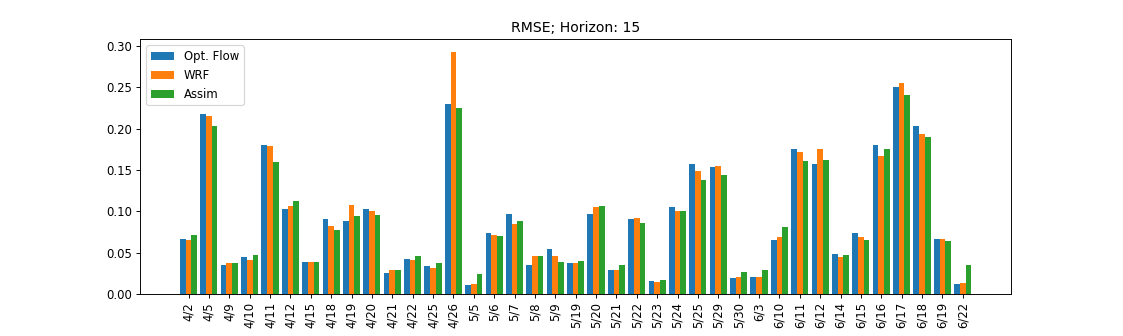

<IPython.core.display.Javascript object>


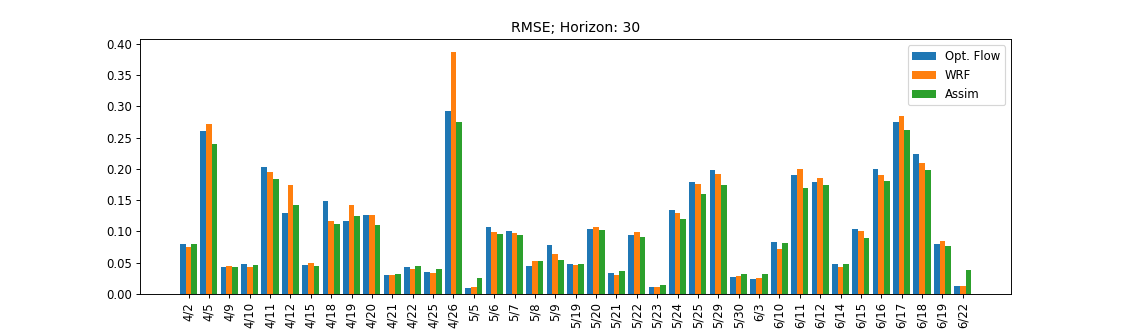

<IPython.core.display.Javascript object>


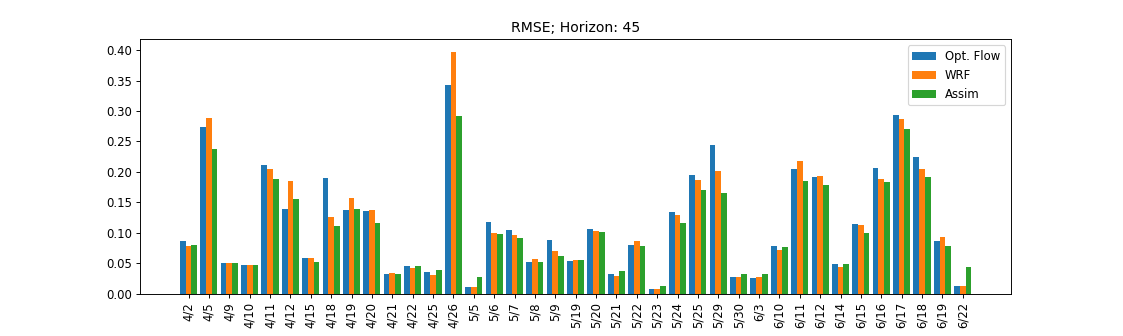

<IPython.core.display.Javascript object>


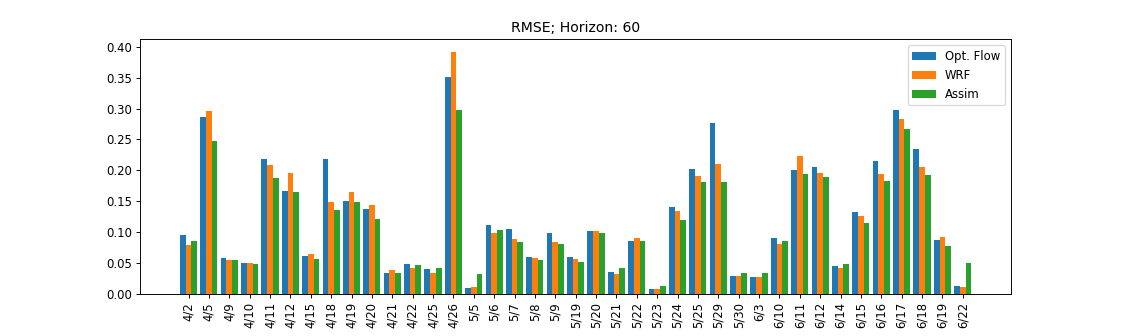

In [13]:
for hor in [15, 30, 45, 60]:
    plt.figure(figsize=figsize)
    plt.bar(xarange,
            opt_flow[hor], width)
    plt.bar(xarange + width,
            wrf_no_div[hor], width)
    plt.bar(xarange + 2*width,
            owp_opt[hor], width)
    plt.xticks(xarange + width, xticks , rotation=90)
    plt.title(f'RMSE; Horizon: {hor}')
    plt.legend(['Opt. Flow',
                'WRF',
                'Assim'])

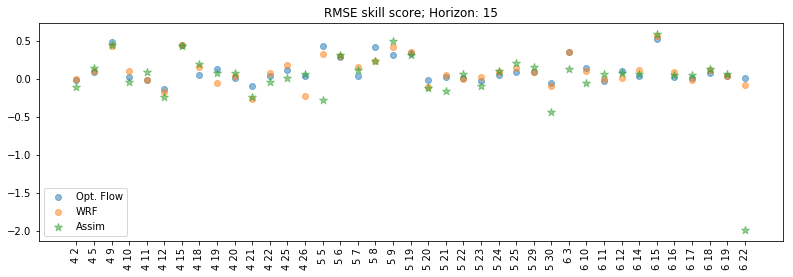

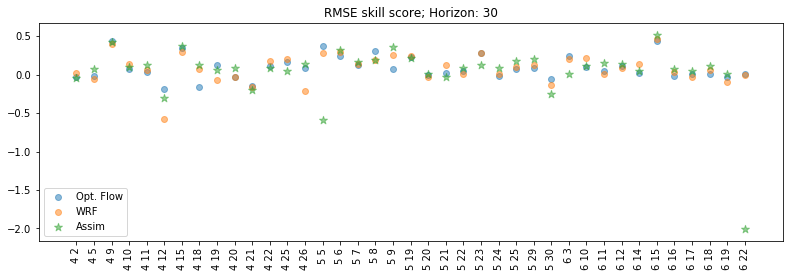

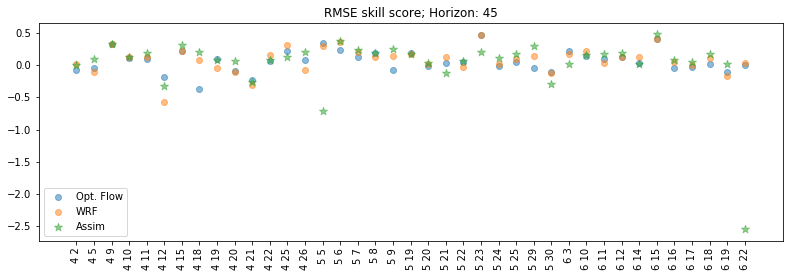

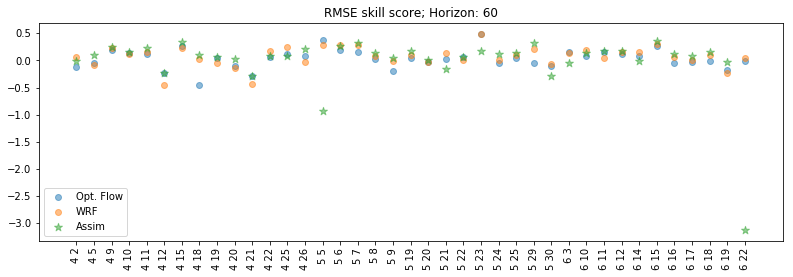

In [28]:
figsize = plt.figaspect(0.3)
for hor in [15, 30, 45, 60]:
    of_skill = 1 - opt_flow[hor]/persistence[hor]
    wrf_skill = 1 - wrf_no_div[hor]/persistence[hor]
    owp_skill = 1 - owp_opt[hor]/persistence[hor]
    
    xarange = np.arange(len(xticks))
    
    plt.figure(figsize=figsize)
    plt.scatter(xarange,
                of_skill, marker='o', alpha=0.5)
    plt.scatter(xarange,
                wrf_skill, marker='o', alpha=0.5)
    plt.scatter(xarange,
                owp_skill, marker='*', s=70, alpha=0.5)
    plt.xticks(xarange, xticks, rotation=90)
    plt.title(f'RMSE skill score; Horizon: {hor}')
    plt.legend(['Opt. Flow',
                'WRF',
                'Assim'])

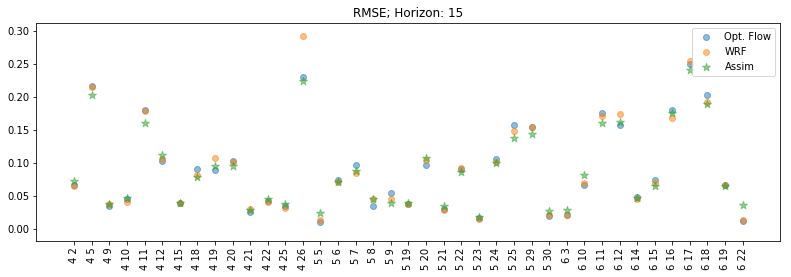

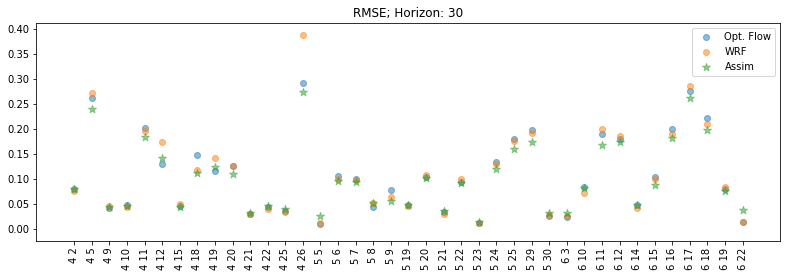

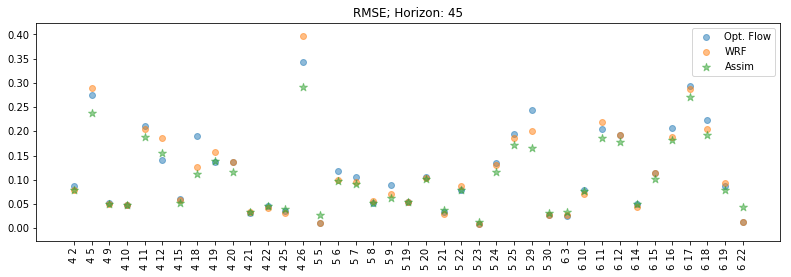

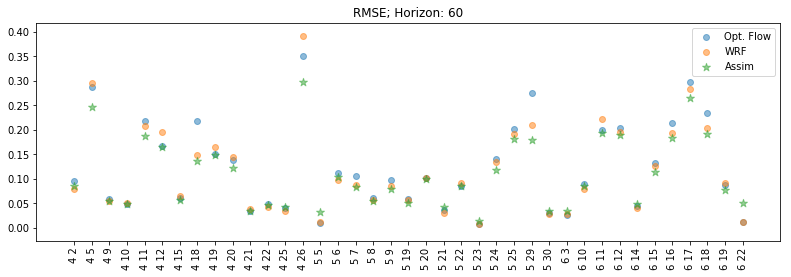

In [29]:
for hor in [15, 30, 45, 60]:
    xarange = np.arange(len(xticks))
    
    plt.figure(figsize=figsize)
    plt.scatter(xarange,
                opt_flow[hor], marker='o', alpha=0.5)
    plt.scatter(xarange,
                wrf_no_div[hor], marker='o', alpha=0.5)
    plt.scatter(xarange,
                owp_opt[hor], marker='*', s=70, alpha=0.5)
    plt.xticks(xarange, xticks, rotation=90)
    plt.title(f'RMSE; Horizon: {hor}')
    plt.legend(['Opt. Flow',
                'WRF',
                'Assim'])